<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

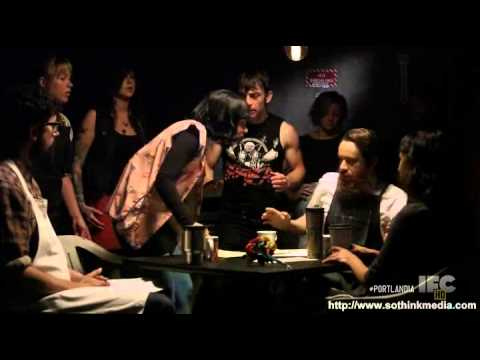

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jasimrashid/Projects/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv('/Users/jasimrashid/Projects/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [146]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [54]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [101]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [103]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [104]:
shops['lemmas'].head()

0    [ , 11/25/2016, 1, check, Love, love, love, at...
1    [ , 12/2/2016, list, Date, Night, Austin, Ambi...
2    [ , 11/30/2016, 1, check, list, Brunch, Spots,...
3    [ , 11/25/2016, cool, decor, good, drink, nice...
4    [ , 12/3/2016, 1, check, locate, Northcross, m...
Name: lemmas, dtype: object

In [6]:
shops.shape

(7616, 3)

In [8]:
shops.star_rating.value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [107]:
# shops.coffee_shop_name.value_counts().head(40)

In [ ]:
Caffé Medici
Epoch Coffee
Halcyon
La Tazza Fresca
Mozart’s Coffee Roasters 

In [24]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [43]:
shops_good = shops[shops['star_rating'].isin([' 5.0 star rating ',' 4.0 star rating '])]

shops_bad = shops[shops['star_rating'].isin([' 3.0 star rating ',' 2.0 star rating ',' 1.0 star rating '])]

In [35]:
shops.star_rating[0]

' 5.0 star rating '

In [46]:
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating


In [188]:
STOP_WORDS = nlp.Defaults.stop_words.union(['1','2',' ',"i've",'it.',"i'm","it's" ])

In [202]:
tokens = []

for doc in nlp.pipe(shops['full_review_text']):
# for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
#         if (token.is_stop == False) & (token.is_punct == False):
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

SyntaxError: invalid syntax (<ipython-input-202-ea8d973a365f>, line 3)

In [196]:
shops.tokens.head()

0    [11/25/2016, check, love, love, loved, atmosph...
1    [12/2/2016, listed, date, night, austin, ambia...
2    [11/30/2016, check, listed, brunch, spots, lov...
3    [11/25/2016, cool, decor, good, drinks, nice, ...
4    [12/3/2016, check, located, northcross, mall, ...
Name: tokens, dtype: object

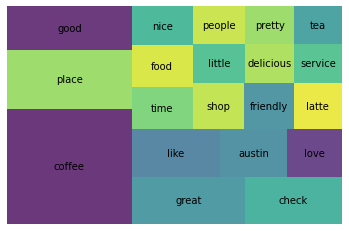

In [197]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

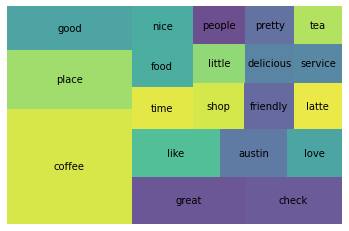

In [200]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

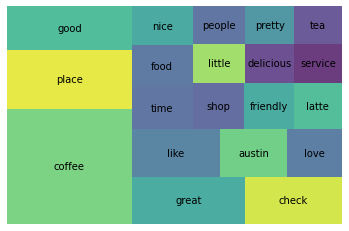

In [222]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [193]:
wc.head(60)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,coffee,4210,8058,1.0,0.020701,0.020701,0.552784
126,place,3029,4264,2.0,0.010954,0.031656,0.397715
94,great,2438,3250,3.0,0.008349,0.040005,0.320116
185,like,2034,2902,4.0,0.007455,0.047461,0.267069
180,good,2084,2779,5.0,0.007139,0.054600,0.273634
15,check-in,1957,1961,6.0,0.005038,0.059638,0.256959
29,love,1434,1806,7.0,0.004640,0.064277,0.188288
796,little,1230,1479,8.0,0.003800,0.068077,0.161502
374,don't,1133,1395,9.0,0.003584,0.071661,0.148766
186,nice,1188,1368,10.0,0.003514,0.075175,0.155987


In [194]:
wc.appears_in.sum()

353468

In [198]:
wc.appears_in.sum()

317599

In [204]:
# Lemmatize tokens

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
#         if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [220]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

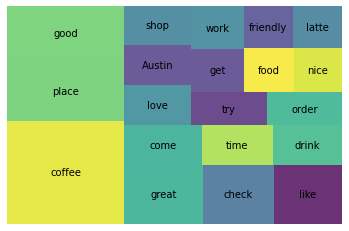

In [224]:
wc = count(shops['lemmas'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [260]:
wc_5 = count(shops[shops['star_rating'] == ' 5.0 star rating ']['lemmas'])
wc_4 = count(shops[shops['star_rating'] == ' 4.0 star rating ']['lemmas'])
wc_3 = count(shops[shops['star_rating'] == ' 3.0 star rating ']['lemmas'])
wc_2 = count(shops[shops['star_rating'] == ' 2.0 star rating ']['lemmas'])
wc_1 = count(shops[shops['star_rating'] == ' 1.0 star rating ']['lemmas'])

wc_good = count(shops[shops['star_rating'].isin([' 5.0 star rating ',' 4.0 star rating '])]['lemmas'])
wc_bad = count(shops[shops['star_rating'].isin([' 1.0 star rating ',' 2.0 star rating ',' 3.0 star rating '])]['lemmas'])

In [263]:
wc_5_top20 = wc_5[wc_5['rank'] <= 20]
wc_4_top20 = wc_4[wc_4['rank'] <= 20]
wc_3_top20 = wc_3[wc_3['rank'] <= 20]
wc_2_top20 = wc_2[wc_2['rank'] <= 20]
wc_1_top20 = wc_1[wc_1['rank'] <= 20]

wc_good_top_20 = wc_good[wc_good['rank'] <= 20]
wc_bad_top_20 = wc_bad[wc_bad['rank'] <= 20]


In [265]:
wc_good_top_20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,coffee,3906,8008,1.0,0.027922,0.027922,0.636156
115,place,3120,4801,2.0,0.016740,0.044661,0.508143
200,good,2929,4341,3.0,0.015136,0.059797,0.477036
87,great,2492,3449,4.0,0.012026,0.071823,0.405863
37,check,2686,2942,5.0,0.010258,0.082081,0.437459
203,like,1677,2434,6.0,0.008487,0.090567,0.273127
26,love,1565,2053,7.0,0.007158,0.097726,0.254886
62,Austin,1544,1988,8.0,0.006932,0.104657,0.251466
383,come,1480,1988,9.0,0.006932,0.111589,0.241042
402,time,1341,1771,10.0,0.006175,0.117764,0.218404


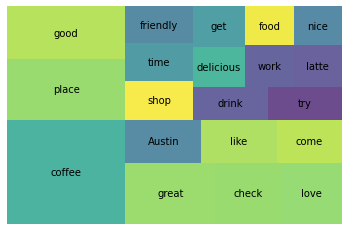

In [273]:
squarify.plot(sizes=wc_5_top20['pct_total'], label=wc_5_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

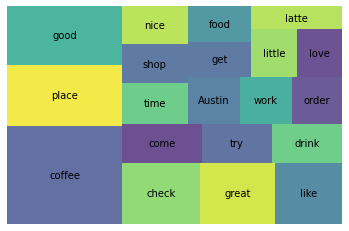

In [272]:
squarify.plot(sizes=wc_4_top20['pct_total'], label=wc_4_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

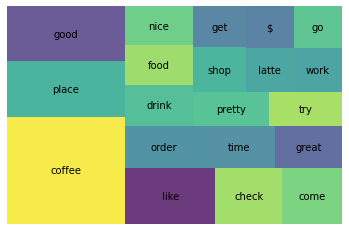

In [271]:
squarify.plot(sizes=wc_3_top20['pct_total'], label=wc_3_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

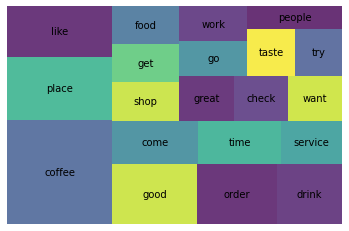

In [267]:
squarify.plot(sizes=wc_2_top20['pct_total'], label=wc_2_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

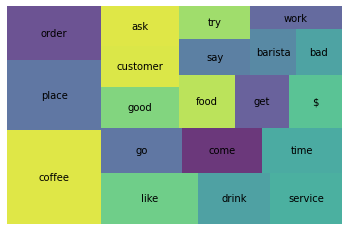

In [266]:
squarify.plot(sizes=wc_1_top20['pct_total'], label=wc_1_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

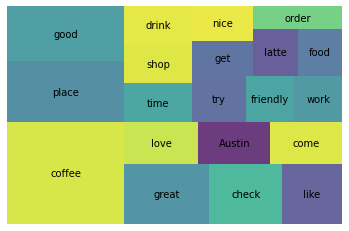

In [276]:
squarify.plot(sizes=wc_good_top_20['pct_total'], label=wc_good_top_20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
wc_good_top_20

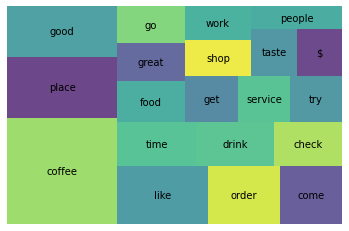

In [278]:
squarify.plot(sizes=wc_bad_top_20['pct_total'], label=wc_bad_top_20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [281]:
wc_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,coffee,3906,8008,1.0,0.027922,0.027922,0.636156
115,place,3120,4801,2.0,0.016740,0.044661,0.508143
200,good,2929,4341,3.0,0.015136,0.059797,0.477036
87,great,2492,3449,4.0,0.012026,0.071823,0.405863
37,check,2686,2942,5.0,0.010258,0.082081,0.437459
...,...,...,...,...,...,...,...
16257,windowed,1,1,16259.0,0.000003,0.999986,0.000163
16258,actuality,1,1,16260.0,0.000003,0.999990,0.000163
16259,crass,1,1,16261.0,0.000003,0.999993,0.000163
16261,digestion,1,1,16262.0,0.000003,0.999997,0.000163


In [287]:
wc_good_v_bad = pd.merge(wc_good, wc_bad, how='inner', on='word')

In [317]:
wc_good_v_bad['count_diff_abs'] = abs(wc_good_v_bad['count_x']-wc_good_v_bad['count_y'])

In [318]:
wc_good_v_bad['pct_total_diff_abs'] = abs(wc_good_v_bad['pct_total_x'] - wc_good_v_bad['pct_total_y'])

In [347]:
wc_good_v_bad['pct_total_diff_pos'] = (wc_good_v_bad['pct_total_x'] - wc_good_v_bad['pct_total_y']).apply(lambda x: max(0,x))

In [358]:
wc_good_v_bad['pct_total_diff_neg'] = (wc_good_v_bad['pct_total_y'] - wc_good_v_bad['pct_total_x']).apply(lambda x: max(0,x))

In [359]:
wc_good_v_bad

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,count_diff_abs,pct_total_diff_abs,pct_total_diff_pos,pct_total_diff_neg
0,coffee,3906,8008,1.0,0.027922,0.027922,0.636156,925,2099,1.0,0.026185,0.026185,0.626694,5909,0.001737,0.001737,0.000000
1,place,3120,4801,2.0,0.016740,0.044661,0.508143,752,1225,2.0,0.015282,0.041467,0.509485,3576,0.001458,0.001458,0.000000
2,good,2929,4341,3.0,0.015136,0.059797,0.477036,647,1000,3.0,0.012475,0.053941,0.438347,3341,0.002661,0.002661,0.000000
3,great,2492,3449,4.0,0.012026,0.071823,0.405863,347,462,11.0,0.005763,0.117089,0.235095,2987,0.006262,0.006262,0.000000
4,check,2686,2942,5.0,0.010258,0.082081,0.437459,488,526,9.0,0.006562,0.105126,0.330623,2416,0.003696,0.003696,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,sequence,1,1,16226.0,0.000003,0.999871,0.000163,3,3,2685.0,0.000037,0.901186,0.002033,2,0.000034,0.000000,0.000034
6164,celiac,1,1,16228.0,0.000003,0.999878,0.000163,1,1,5770.0,0.000012,0.967890,0.000678,0,0.000009,0.000000,0.000009
6165,latke,1,1,16250.0,0.000003,0.999955,0.000163,1,2,4387.0,0.000025,0.950637,0.000678,1,0.000021,0.000000,0.000021
6166,seated,1,1,16251.0,0.000003,0.999958,0.000163,1,1,7516.0,0.000012,0.989671,0.000678,0,0.000009,0.000000,0.000009


In [401]:
wc_gvb_top40_by_diff = wc_good_v_bad.sort_values(['pct_total_diff_pos'],ascending=0).head(40)

In [410]:
wc_gvb_top40_by_diff

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,count_diff_abs,pct_total_diff_abs,pct_total_diff_pos,pct_total_diff_neg
3,great,2492,3449,4.0,0.012026,0.071823,0.405863,347,462,11.0,0.005763,0.117089,0.235095,2987,0.006262,0.006262,0.0
6,love,1565,2053,7.0,0.007158,0.097726,0.254886,204,245,39.0,0.003056,0.233617,0.138211,1808,0.004102,0.004102,0.0
4,check,2686,2942,5.0,0.010258,0.082081,0.437459,488,526,9.0,0.006562,0.105126,0.330623,2416,0.003696,0.003696,0.0
7,Austin,1544,1988,8.0,0.006932,0.104657,0.251466,242,288,30.0,0.003593,0.204214,0.163957,1700,0.003339,0.003339,0.0
21,delicious,1093,1205,22.0,0.004201,0.179493,0.178013,82,85,170.0,0.001060,0.461159,0.055556,1120,0.003141,0.003141,0.0
13,friendly,1440,1515,14.0,0.005282,0.141188,0.234528,188,209,54.0,0.002607,0.275533,0.127371,1306,0.002675,0.002675,0.0
2,good,2929,4341,3.0,0.015136,0.059797,0.477036,647,1000,3.0,0.012475,0.053941,0.438347,3341,0.002661,0.002661,0.0
46,amazing,679,780,47.0,0.002720,0.260423,0.110586,46,50,286.0,0.000624,0.555632,0.031165,730,0.002096,0.002096,0.0
49,favorite,651,767,50.0,0.002674,0.268505,0.106026,51,57,251.0,0.000711,0.532316,0.034553,710,0.001963,0.001963,0.0
55,perfect,621,700,56.0,0.002441,0.283815,0.101140,39,42,367.0,0.000524,0.602126,0.026423,658,0.001917,0.001917,0.0


In [396]:
wc_good_v_bad.sort_values(['pct_total_diff_abs'],ascending=0)

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,count_diff_abs,pct_total_diff_abs,pct_total_diff_pos,pct_total_diff_neg
3,great,2492,3449,4.0,0.012026,0.071823,0.405863,347,462,11.0,0.005763,0.117089,0.235095,2987,6.262275e-03,6.262275e-03,0.000000e+00
19,order,1016,1370,20.0,0.004777,0.170961,0.165472,430,759,5.0,0.009468,0.075199,0.291328,611,4.691647e-03,0.000000e+00,4.691647e-03
6,love,1565,2053,7.0,0.007158,0.097726,0.254886,204,245,39.0,0.003056,0.233617,0.138211,1808,4.101874e-03,4.101874e-03,0.000000e+00
4,check,2686,2942,5.0,0.010258,0.082081,0.437459,488,526,9.0,0.006562,0.105126,0.330623,2416,3.696118e-03,3.696118e-03,0.000000e+00
7,Austin,1544,1988,8.0,0.006932,0.104657,0.251466,242,288,30.0,0.003593,0.204214,0.163957,1700,3.338818e-03,3.338818e-03,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,satisfied,18,18,1860.0,0.000063,0.845898,0.002932,5,5,2038.0,0.000062,0.870748,0.003388,13,3.863784e-07,3.863784e-07,0.000000e+00
1428,Savannah,18,25,1450.0,0.000087,0.816198,0.002932,4,7,1566.0,0.000087,0.838363,0.002710,18,1.564130e-07,0.000000e+00,1.564130e-07
1426,cracker,22,25,1448.0,0.000087,0.816024,0.003583,7,7,1547.0,0.000087,0.836704,0.004743,18,1.564130e-07,0.000000e+00,1.564130e-07
1408,drinking,23,25,1428.0,0.000087,0.814280,0.003746,6,7,1463.0,0.000087,0.829368,0.004065,18,1.564130e-07,0.000000e+00,1.564130e-07


In [339]:
wc_gvb_top40 = wc_good_v_bad[wc_good_v_bad['rank_x'] <= 40]

In [340]:
wc_gvb_top20 = wc_good_v_bad[wc_good_v_bad['rank_x'] <= 20]

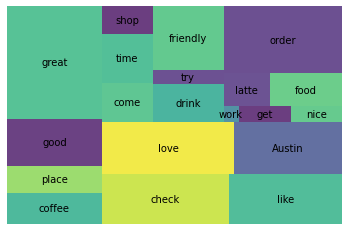

In [325]:
squarify.plot(sizes=wc_gvb_top20['pct_total_diff_abs'], label=wc_gvb_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [402]:
wc_gvb_tidy = wc_gvb_top40[['word','pct_total_x','pct_total_y']][0:10].melt('word',var_name='x_or_y',value_name='pct_total')

In [411]:
wc_gvb_top40_by_diff_tidy = wc_gvb_top40_by_diff[['word','pct_total_x','pct_total_y']][0:10].melt('word',var_name='x_or_y',value_name='pct_total')

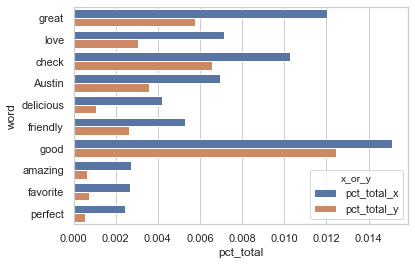

In [413]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="pct_total", y="word", hue='x_or_y',data=wc_gvb_top40_by_diff_tidy)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

